<div class="alert alert-block alert-info">
<span style='background :yellow;font-size:14px;font-weight:bold' > IMPORTANT! </span><br>
<span style='color:Black;font-size:12px' >IF YOU WANT TO RUN THE  CODE RUN IT IN YOUR OWN JUPYTER NOTEBOOK IN YOUR PC AND NOT COURSERA LAB SINCE SOME MODULES NEED TO BE INSTALLED, ALSO KNOW I WON'T BE SHARING MY API FOR DOWNLOADING.
THE DATA API KEY IS FREE TO GET ONE AT <a href="https://opendata.aemet.es/centrodedescargas/inicio">https://opendata.aemet.es/centrodedescargas/inicio</a>  SPANISH WEATHER AUTHORITY</span>
</div>


# <span style='color:Blue'><span style='font-family:"Times New Roman"'><center> Mean temperature difference between Monistrol de Montserrat and Barcelona  <br>  using AEMET API key and DATA</center> </span>

## <span style='font-family:"Times New Roman"'><span style='font-size:25px'>Context

<span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>I live in small town outside Barcelona Spain called Monistrol de Montserrat which is around 50km from Barcelona. Since I lived here I've noticed what is a fact that temperature here is always a few degrees different from Barcelona few degrees colder in winter and few degrees warmer during summer. Which is normal due to coastal weather in Barcelona an Monistrol de Montserrat is 50km inland somehow north-east of Barcelona

<span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>But I've always wanted to put a number to this couple of degrees that I've felt. And why not used the little knowledge I have and the passion for data anlysis to get this done to pin point this difference.
    
## <span style='font-family:"Times New Roman"'><span style='font-size:25px'>1. Region and domain

* <span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>Barcelona Province, Spain
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>Weather Data
    
## <span style='font-family:"Times New Roman"'><span style='font-size:25px'>2. Research question

* <span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>Mean temperature difference between Monistrol de Montserrat (Manresa) and Barcelona city in Spain.


## <span style='font-family:"Times New Roman"'><span style='font-size:25px'>3. Data recollection - Links

<span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>The AEMET ("Agencia Estatal de Meteorología") Spanish Metereological Agency offers some of the meterological data for free on their website through API Key connection. 

<span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>First I will download one dataset containing the location of the available weather stations where you get a json as a response into an URL, this dataset stations_df will be saved as stations_data.csv for later usage if requuired. It will be filtered out to use only weather stations located in Barcelona Province and map it out to choose the weather stations closest to my town and Barcelona City.
    

<span style='font-family:"Times New Roman"'><span style='font-size:18px; font-weight:bold'><left>Station dataset variables:

* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**latitud** : latitude coordinate of the weather station "413515N"
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**provincia** : province where the weather station is located
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**altitud** : weather station altitude meters above sea level
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**indicativo** : weather station code
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**nombre** : name of wather station
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**indsinop** : internal code
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**logitud** : longitude coordinate of the weather station "023224E"
    

<span style='font-family:"Times New Roman"'><span style='font-size:18px'><left>After identifying the weather stations two datasets will be downloaded one for a barcelona weather station and the second for manresa weather station. Five years of records will be downloaded from JAN-2017 to DEC-2021 (5 year is the maximum span alowed on free API key). Two csv file will be saved for later usage if required.

<span style='font-family:"Times New Roman"'><span style='font-size:18px; font-weight:bold'><left>Weather station dataset variables:

* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**fecha** : date in MM-DD-YYYY format 
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**indicativo** : weather station code
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**altitud** : weather station altitude meters above sea level
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**nombre** : name of wather station
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**prec** : precipitation (not used)
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**tmed** : daily mean temperature
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**tmin** : daily min temperature (degrees C)
* <span style='font-family:"Times New Roman"'><span style='font-size:18px'>**tmax** : daily max temperature (degrees C)

    </span>




In [1]:
#this cell is to load anonymously the API key to get the data from AEMET. 
#you can get your own API key and replace for the variable AEMET_api.
%load_ext dotenv
%dotenv
import os
AEMET_api=os.getenv("AEMET_api")


In [2]:
#requirements
import http.client
import json
import requests
from pandas import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import folium
from folium.features import DivIcon
from branca.element import Template, MacroElement
import statistics
import seaborn as sns
from matplotlib import cbook

In [3]:
#let's get list of available weather stations
#connecting to AEMET site and excuting the proper request for more info you cna check https://opendata.aemet.es/dist/index.html?
#for this you can request an API key

connect_aemet = http.client.HTTPSConnection("opendata.aemet.es")

headers = {
    'cache-control': "no-cache"
    }

connect_aemet.request("GET", "https://opendata.aemet.es/opendata/api/valores/climatologicos/inventarioestaciones/todasestaciones/?api_key="+AEMET_api, headers=headers)

response = connect_aemet.getresponse()
data = response.read()

json_data = json.loads(data)
    
urldata = json_data['datos']

response = requests.get(urldata)
dictr = response.json()
stations_df = json_normalize(dictr)

stations_df.to_csv('stations_data.csv') #saving data to .csv file 

#data cleaning and converting orgiginal lat and lon location format to proper format for later mapping.

stations_df['latitud Degrees']=stations_df['latitud'].str[:2]
stations_df['latitud Minutes']=stations_df['latitud'].str[2:4]
stations_df['latitud Seconds']=stations_df['latitud'].str[4:6]
stations_df['latitud Degrees']=stations_df['latitud Degrees'].astype(float)
stations_df['latitud Minutes']=stations_df['latitud Minutes'].astype(float)
stations_df['latitud Seconds']=stations_df['latitud Minutes'].astype(float)
stations_df['latitud']=stations_df['latitud Degrees']+((stations_df['latitud Minutes'])/60)+((stations_df['latitud Seconds'])/3600)

stations_df['longitud Degrees']=stations_df['longitud'].str[:2]
stations_df['longitud Minutes']=stations_df['longitud'].str[2:4]
stations_df['longitud Seconds']=stations_df['longitud'].str[4:6]
stations_df['longitud Degrees']=stations_df['longitud Degrees'].astype(float)
stations_df['longitud Minutes']=stations_df['longitud Minutes'].astype(float)
stations_df['longitud Seconds']=stations_df['longitud Minutes'].astype(float)
stations_df['longitud']=stations_df['longitud Degrees']+((stations_df['longitud Minutes'])/60)+((stations_df['longitud Seconds'])/3600)

stations_df=stations_df[['provincia','nombre','indicativo','indsinop','latitud','longitud','altitud']]
stations_df=stations_df.loc[stations_df['provincia']=='BARCELONA']
stations_df #checking df filtered to stations only in the Barcelona Province

,provincia,nombre,indicativo,indsinop,latitud,longitud,altitud
0,BARCELONA,ARENYS DE MAR,0252D,08186,41.593056,2.542222,74
1,BARCELONA,BARCELONA AEROPUERTO,0076,08181,41.288056,2.067778,4
2,BARCELONA,"BARCELONA, FABRA",0200E,,41.423611,2.118611,408
3,BARCELONA,BARCELONA,0201D,08180,41.389722,2.203333,6
4,BARCELONA,MANRESA,0149X,08174,41.728611,1.847222,291
5,BARCELONA,SABADELL AEROPUERTO,0229I,08192,41.525278,2.101667,146
6,BARCELONA,SANTA SUSANNA,0255B,08188,41.660833,2.694722,40


In [4]:
#for interactive mapping and later use of image in the final plot let's plot and highlight the point of interest
#using folium module and some hmtl and ccs to add the legend.


monistrol_lat=41.6095708
monistrol_lon=1.8427346

barcelona_station_lat=stations_df[stations_df['indicativo']=='0201D'].latitud
barcelona_station_lon=stations_df[stations_df['indicativo']=='0201D'].longitud

manresa_station_lat=stations_df[stations_df['indicativo']=='0149X'].latitud
manresa_station_lon=stations_df[stations_df['indicativo']=='0149X'].longitud


lats=stations_df['latitud']
lons=stations_df["longitud"]

lons_mean=statistics.mean(lons)
lats_mean=statistics.mean(lats)



m=folium.Map(location=[lats_mean,lons_mean],tiles="cartodbpositron")

for index, row in stations_df.iterrows():
    folium.CircleMarker(location=[row.latitud,row.longitud], radius=5, color='red', fill=True, fill_color='black',fill_opacity=1,
                       popup=row.nombre+"-"+row.indicativo
                       ).add_to(m)


folium.CircleMarker([monistrol_lat, monistrol_lon], 5, fill=True,color='red', fill_color='blue',fill_opacity=1,
              popup='Monistrol de Montserrat',
             ).add_to(m)

folium.map.Marker(
    [monistrol_lat+0.01, monistrol_lon-0.10],
    icon=DivIcon(icon_size=(150,36),icon_anchor=(0,0),
        html='<div style="font-size: 10pt;color: blue">%s</div>' % "Monistrol\n"+'<div style="font-size: 10pt;color: blue">%s</div>'%"de Montserrat",
        )).add_to(m)

folium.map.Marker(
    [barcelona_station_lat+0.02, barcelona_station_lon+0.02],
    icon=DivIcon(icon_size=(150,36),icon_anchor=(0,0),
        html='<div style="font-size: 10pt;color: red;font-weight:bold">%s</div>' % "Barcelona\n"+'<div style="font-size: 10pt;color: red;font-weight:bold">%s</div>'%"0201D",
        )).add_to(m)

folium.map.Marker(
    [manresa_station_lat+0.02, manresa_station_lon+0.02],
    icon=DivIcon(icon_size=(150,36),icon_anchor=(0,0),
        html='<div style="font-size: 10pt;color: red;font-weight:bold">%s</div>' % "Manresa\n"+'<div style="font-size: 10pt;color: red;font-weight:bold">%s</div>'%"0149X",
        )).add_to(m)


template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:black;opacity:0.7;'></span>Weather station</li>
    <li><span style='background:blue;opacity:0.7;'></span>Monistrol de Montserrat</li>


  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>

  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
      display: block;
      float: left;
      width: 12px;
      margin-right: 5px;
      margin-left: 0;
      margin-top:-2;
      height: 12px;
      border-radius: 100%;
      border: 3px solid;
      border-color: red;
      background-color: black;
      opacity: 1;
    
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
    
</style>
{% endmacro %}"""
macro = MacroElement()
macro._template = Template(template)
m.get_root().add_child(macro)
#map will be captured into map_final.png for later incorporation into the final visualization
m



#### Let´s get the historical data for the last five years in the two selected stations (five years is the maximum on free API key)
* Barcelona
* Manresa

In [5]:
#fetching daily weather data for the last five years from JAN-2017 until DEC-2021 and store into csv files.
conn = http.client.HTTPSConnection("opendata.aemet.es")

connect_aemet = http.client.HTTPSConnection("opendata.aemet.es")

headers = {
    'cache-control': "no-cache"
    }

initial_date="2017-01-01"
final_date="2021-12-31"
barcelona_station_id="0201D"
connect_aemet.request("GET", "https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/"+ initial_date +"T00:00:00UTC/fechafin/"+final_date + "T23:59:59UTC/estacion/"+barcelona_station_id+"/?api_key="+AEMET_api, headers=headers)

res = connect_aemet.getresponse()
data = res.read()
json_data = json.loads(data)
urldatos = json_data['datos']

response = requests.get(urldatos)
dictr = response.json()
recs = dictr[:]
barcelona_df = json_normalize(dictr)

manresa_station_id="0149X"
connect_aemet.request("GET", "https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/"+ initial_date +"T00:00:00UTC/fechafin/"+final_date + "T23:59:59UTC/estacion/"+manresa_station_id+"/?api_key="+AEMET_api, headers=headers)

res = connect_aemet.getresponse()
data = res.read()
json_data = json.loads(data)
urldatos = json_data['datos']

response = requests.get(urldatos)
dictr = response.json()
manresa_df = json_normalize(dictr)

#let´s save the data to csv file so we don't create requests everytime

manresa_df.to_csv('manresa_data.csv')
barcelona_df.to_csv('barcelona_data.csv')

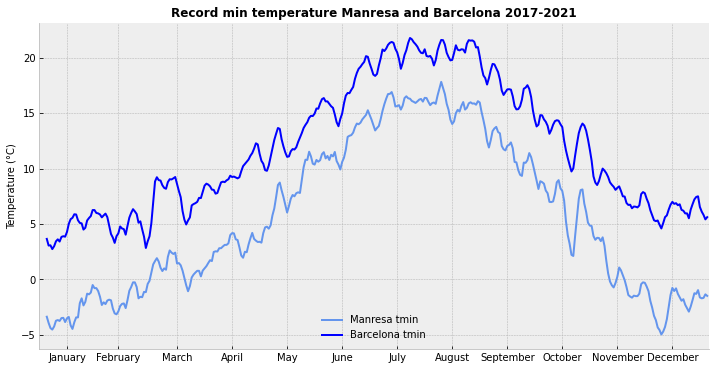

In [6]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

manresa_mean=manresa_df[['fecha','tmed']]
barcelona_mean=barcelona_df[['fecha','tmed']]

manresa_min=manresa_df[['fecha','tmin']]
manresa_max=manresa_df[['fecha','tmax']]
barcelona_min=barcelona_df[['fecha','tmin']]
barcelona_max=barcelona_df[['fecha','tmax']]

df_list=[barcelona_min,barcelona_max,manresa_min,manresa_max,manresa_mean,barcelona_mean]

for df in df_list:
    df.loc[:,:].dropna()
    df.reset_index(drop=True)
    df.loc[:]=df.loc[:].replace(',','.', regex=True)
    df.iloc[:,-1]=df.iloc[:,-1].astype(float)
    df.drop(df[df['fecha'].str.contains('02-29')].index, inplace=True)
    df['fecha']=df['fecha'].str[5:]

manresa_min=manresa_min.groupby('fecha')['tmin'].min()
manresa_max=manresa_max.groupby('fecha')['tmax'].max()
manresa_mean_max=manresa_mean.groupby('fecha')['tmed'].max()
manresa_mean_min=manresa_mean.groupby('fecha')['tmed'].min()


barcelona_min=barcelona_min.groupby('fecha')['tmin'].min()
barcelona_max=barcelona_max.groupby('fecha')['tmax'].max()
barcelona_mean_max=barcelona_mean.groupby('fecha')['tmed'].max()
barcelona_mean_min=barcelona_mean.groupby('fecha')['tmed'].min()

barcelona_min = barcelona_min.rolling(5).mean()
barcelona_max = barcelona_max.rolling(5).mean()

manresa_min = manresa_min.rolling(5).mean()
manresa_max = manresa_max.rolling(5).mean()


months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
plt.style.use('bmh')
figure_gca=plt.gca()

plt.xlim([0, 365])
xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ytickvalues=[-10,-5,0,5,10,20,30,40,50]
plt.xticks(ticks = xtickvalues ,labels = months, rotation = 'horizontal',fontsize=10)
#plt.yticks(ticks = ytickvalues ,fontsize=8)

#plt.plot(range(0,365), manresa_max, color='firebrick',label = "Record high temp" )
plt.plot(range(0,365), manresa_min, color='cornflowerblue', label = "Manresa tmin")

#plt.plot(range(0,365), barcelona_max, color='red',label = "Record high temp" )
plt.plot(range(0,365), barcelona_min, color='blue', label = "Barcelona tmin")

plt.gca().set_title('Record min temperature Manresa and Barcelona 2017-2021', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature (°C)',fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=10, frameon = False)


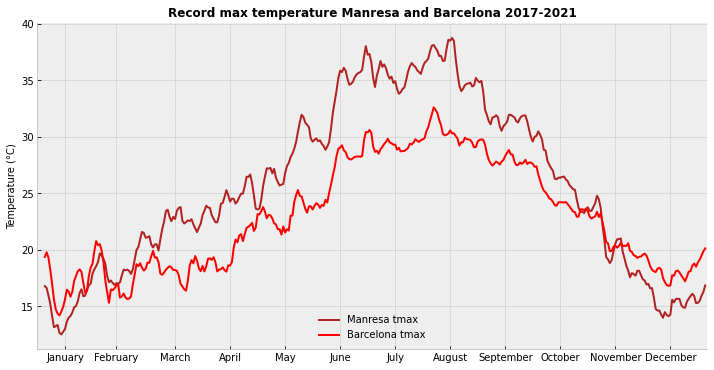

In [7]:

months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6));
plt.style.use('bmh')
figure_gca=plt.gca()

plt.xlim([0, 365])
xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ytickvalues=[-10,-5,0,5,10,20,30,40,50]
plt.xticks(ticks = xtickvalues ,labels = months, rotation = 'horizontal',fontsize=10)
#plt.yticks(ticks = ytickvalues ,fontsize=8)

plt.plot(range(0,365), manresa_max, color='firebrick',label = "Manresa tmax" )

plt.plot(range(0,365), barcelona_max, color='red',label = "Barcelona tmax" )


plt.gca().set_title('Record max temperature Manresa and Barcelona 2017-2021', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature (°C)',fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=10, frameon = False)



In [8]:
diff_min=manresa_min-barcelona_min
diff_min = diff_min.rolling(1).mean()
mean_min=diff_min.mean()
diff_max=manresa_max-barcelona_max
diff_max = diff_max.rolling(1).mean()
mean_max=diff_max.mean()
mean_max
mean_min
print("Mean max Temperature Difference is: " + str(round(mean_max,2))+'°C' +'\n'
     + "Mean min Temperature Difference in (°C) is: " + str(round(mean_min,2))+'°C')



Mean max Temperature Difference is: 2.75°C
Mean min Temperature Difference in (°C) is: -6.17°C


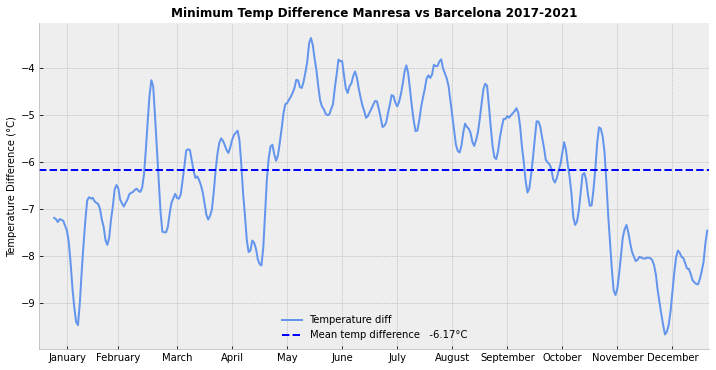

In [9]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
plt.style.use('bmh')
figure_gca=plt.gca()

plt.xlim([0, 365])
xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ytickvalues=[-10,-5,0,5,10,20,30,40,50]
plt.xticks(ticks = xtickvalues ,labels = months, rotation = 'horizontal',fontsize=10)
#plt.yticks(ticks = ytickvalues ,fontsize=8)

#plt.plot(range(0,365), diff_max, color='firebrick',label = "Mean high temp diff" )
plt.plot(range(0,365), diff_min.rolling(5).mean(), color='cornflowerblue',label='Temperature diff')
plt.axhline(y=mean_min, color='blue', linestyle='dashed', label='Mean temp difference   '+str(round(mean_min,2))+'°C')

plt.gca().set_title('Minimum Temp Difference Manresa vs Barcelona 2017-2021', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature Difference (°C)',fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=10, frameon = False)


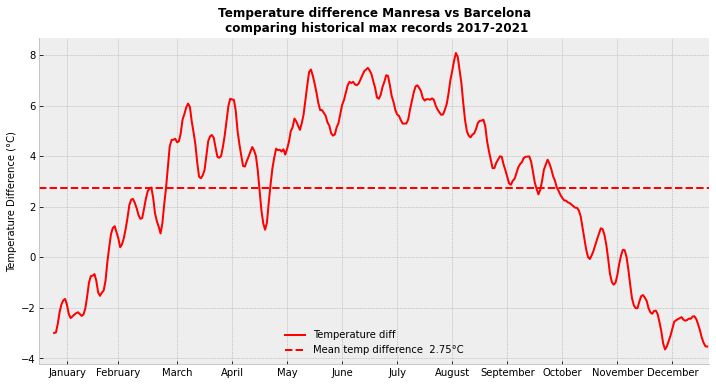

In [10]:

months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
plt.style.use('bmh')
figure_gca=plt.gca()

plt.xlim([0, 365])
xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ytickvalues=[-10,-5,0,5,10,20,30,40,50]
plt.xticks(ticks = xtickvalues ,labels = months, rotation = 'horizontal',fontsize=10)
#plt.yticks(ticks = ytickvalues ,fontsize=8)


plt.plot(range(0,365), diff_max.rolling(5).mean(), color='red',label='Temperature diff')
plt.axhline(y=mean_max, color='r', linestyle='dashed', label='Mean temp difference  '+str(round(mean_max,2))+'°C')

plt.gca().set_title('Temperature difference Manresa vs Barcelona\n comparing historical max records 2017-2021', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature Difference (°C)',fontsize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=10, frameon = False)

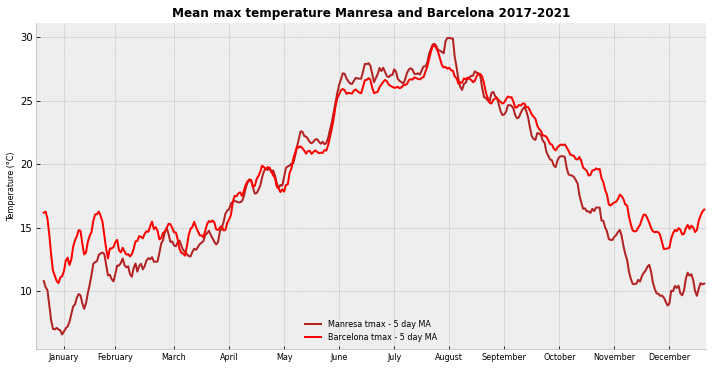

In [11]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6));
plt.style.use('bmh')
figure_gca=plt.gca()

plt.xlim([0, 365])
xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ytickvalues=[-10,-5,0,5,10,20,30,40,50]
plt.xticks(ticks = xtickvalues ,labels = months, rotation = 'horizontal',fontsize=8)
#plt.yticks(ticks = ytickvalues ,fontsize=8)

plt.plot(range(0,365), manresa_mean_max.rolling(5).mean(), color='firebrick',label = "Manresa tmax - 5 day MA" )

plt.plot(range(0,365), barcelona_mean_max.rolling(5).mean(), color='red',label = "Barcelona tmax - 5 day MA" )


plt.gca().set_title('Mean max temperature Manresa and Barcelona 2017-2021', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature (°C)',fontsize=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=8, frameon = False)

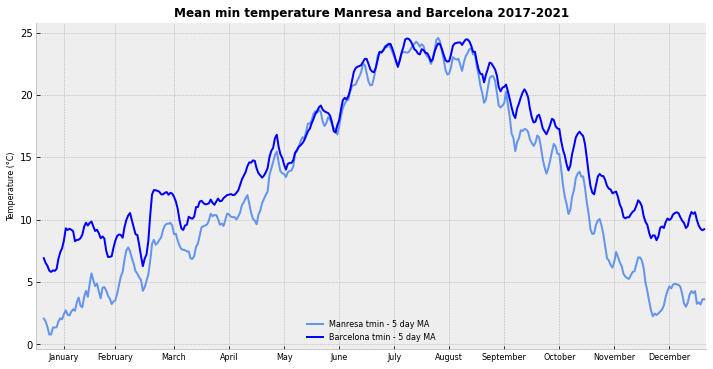

In [12]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12,6))
plt.style.use('bmh')
figure_gca=plt.gca()

plt.xlim([0, 365])
xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ytickvalues=[-10,-5,0,5,10,20,30,40,50]
plt.xticks(ticks = xtickvalues ,labels = months, rotation = 'horizontal',fontsize=8)
#plt.yticks(ticks = ytickvalues ,fontsize=8)

#plt.plot(range(0,365), manresa_max, color='firebrick',label = "Record high temp" )
plt.plot(range(0,365), manresa_mean_min.rolling(5).mean(), color='cornflowerblue', label = "Manresa tmin - 5 day MA")

#plt.plot(range(0,365), barcelona_max, color='red',label = "Record high temp" )
plt.plot(range(0,365), barcelona_mean_min.rolling(5).mean(), color='blue', label = "Barcelona tmin - 5 day MA")

plt.gca().set_title('Mean min temperature Manresa and Barcelona 2017-2021', fontsize=12, fontweight ='bold')
#plt.gca().set_xlabel('Day of the year')
plt.gca().set_ylabel('Temperature (°C)',fontsize=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=8, frameon = False)

In [13]:
diff_min=manresa_mean_min-barcelona_mean_min
diff_min = diff_min.rolling(1).mean()
mean_min=diff_min.mean()
diff_max=manresa_mean_max-barcelona_mean_max
diff_max = diff_max.rolling(1).mean()
mean_max=diff_max.mean()
mean_max
mean_min
print("Mean max Temperature Difference is: " + str(round(mean_max,2))+'°C' +'\n'
     + "Mean min Temperature Difference in (°C) is: " + str(round(mean_min,2))+'°C')

Mean max Temperature Difference is: -1.33°C
Mean min Temperature Difference in (°C) is: -2.62°C


<IPython.core.display.Javascript object>


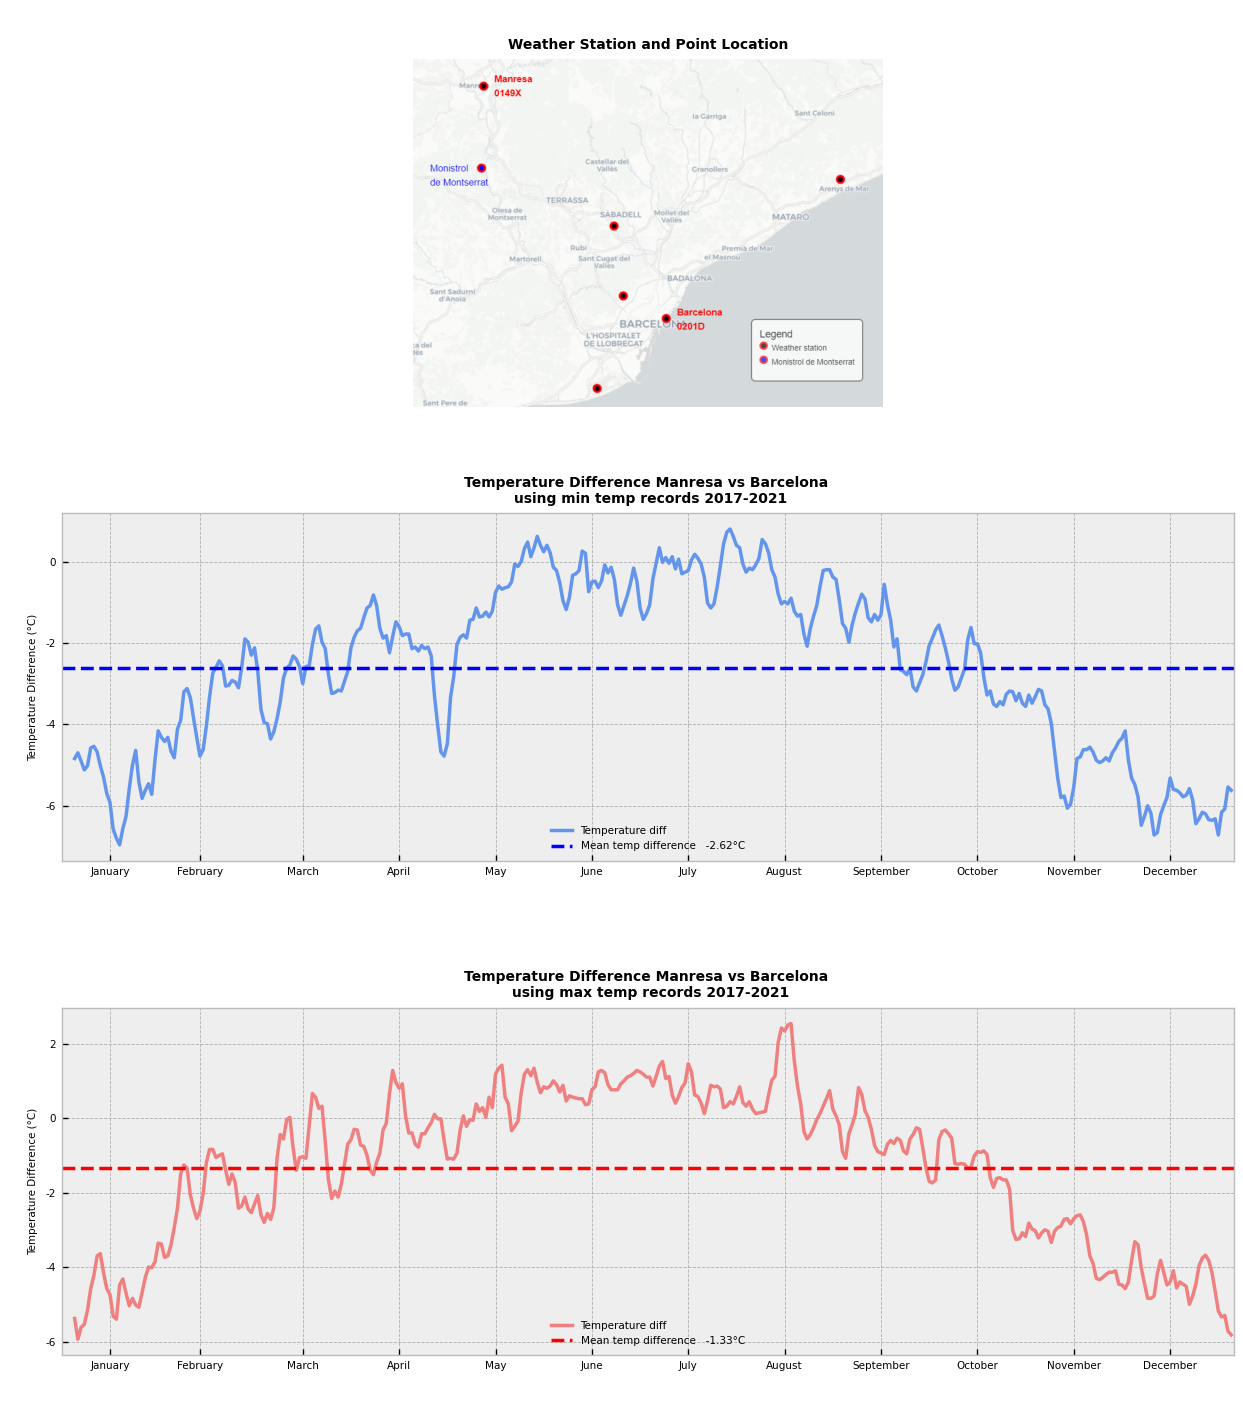

In [35]:
%matplotlib notebook
image = plt.imread('map_final.png')

fig, figsize=(14,8)
plt.subplots(constrained_layout=True)
#plt.tight_layout(pad=20, w_pad=0.5, h_pad=20)





ax1 = plt.subplot2grid(shape=(36, 12), loc=(0, 0), colspan=12, rowspan=12)
ax2 = plt.subplot2grid(shape=(36, 12), loc=(12, 0),rowspan=12,colspan=12)
ax3 = plt.subplot2grid(shape=(36, 12), loc=(24, 0), rowspan=12,colspan=12)

ax1.imshow(image)
ax1.axis('off')
ax1.set_title('Weather Station and Point Location', fontsize=8, fontweight ='bold')

ax2.set_xlim([0, 365])
ax2.set_xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ax2.set_ytickvalues=[-8,-6,-4,-2,0,2,4]
ax2.set_xticks(xtickvalues)
ax2.set_xticklabels(months,fontsize=6)
ax2.set_yticks(np.arange(-8, 6, 2))
ax2.set_yticklabels(np.arange(-8, 6, 2),fontsize=6)

ax2.plot(range(0,365), diff_min.rolling(5).mean(), color='cornflowerblue',label='Temperature diff')
ax2.axhline(y=mean_min, color='blue', linestyle='dashed', label='Mean temp difference   '+str(round(mean_min,2))+'°C')

ax2.set_title('Temperature Difference Manresa vs Barcelona \n using min temp records 2017-2021', fontsize=8, fontweight ='bold')
ax2.set_ylabel('Temperature Difference (°C)',fontsize=6)
ax2.legend(loc = 8, fontsize=6, frameon = False)


ax3.set_xlim([0, 365])
ax3.set_xtickvalues=[15,43,75,105,135,165,195,225,255,285,315,345]
ax3.set_ytickvalues=[-8,-6,-4,-2,0,2,4]
ax3.set_xticks(xtickvalues)
ax3.set_xticklabels(months,fontsize=6)
ax3.set_yticks(np.arange(-6, 6, 2))
ax3.set_yticklabels(np.arange(-6, 6, 2),fontsize=6)

ax3.plot(range(0,365), diff_max.rolling(5).mean(), color='lightcoral',label='Temperature diff')
ax3.axhline(y=mean_max, color='red', linestyle='dashed', label='Mean temp difference   '+str(round(mean_max,2))+'°C')

ax3.set_title('Temperature Difference Manresa vs Barcelona \n using max temp records 2017-2021', fontsize=8, fontweight ='bold')
ax3.set_ylabel('Temperature Difference (°C)',fontsize=6)
ax3.legend(loc = 8, fontsize=6, frameon = False)

plt.savefig('final.png')